/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


<Axes: xlabel='date'>

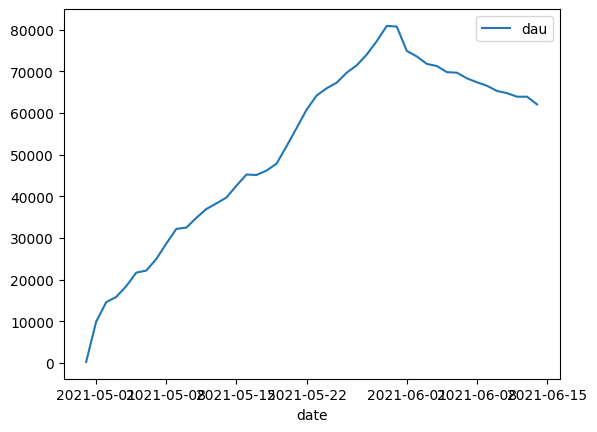

In [1]:
from DreamGamesAnalytics import DreamGamesAnalytics
service_account_path = '/home/yusuf/DataScience/dream_games/ybektas20.json'
analytics = DreamGamesAnalytics(service_account_path)
# ARPDAU grouped by date/platform/network/country
dau_trend = analytics.dau_trend().set_index('date')
dau_trend.plot()



### USER ENGAGEMENT

In [ ]:
dau_by_country = analytics.dau_by_country()
dau_by_country.unstack

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,date,country,dau
0,2021-04-30,Mercury,80
1,2021-04-30,Pluton,41
2,2021-04-30,Uranus,2
3,2021-04-30,Venus,94
4,2021-05-01,Mercury,4659
...,...,...,...
224,2021-06-14,Mercury,25588
225,2021-06-14,Pluton,19090
226,2021-06-14,Saturn,2121
227,2021-06-14,Uranus,1252


<Axes: xlabel='date'>

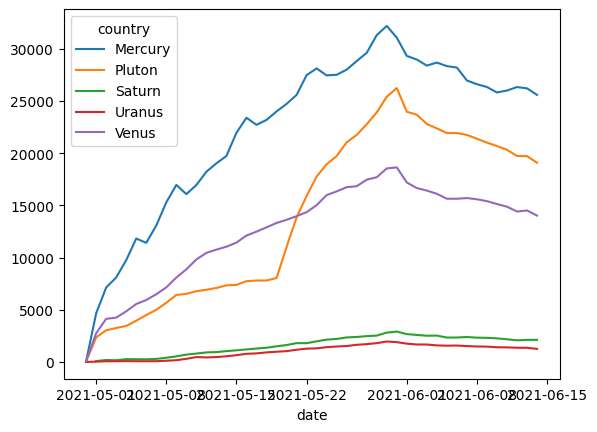

In [16]:
dau_by_country.pivot(index='date', columns='country', values='dau').plot()

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


<Axes: xlabel='date'>

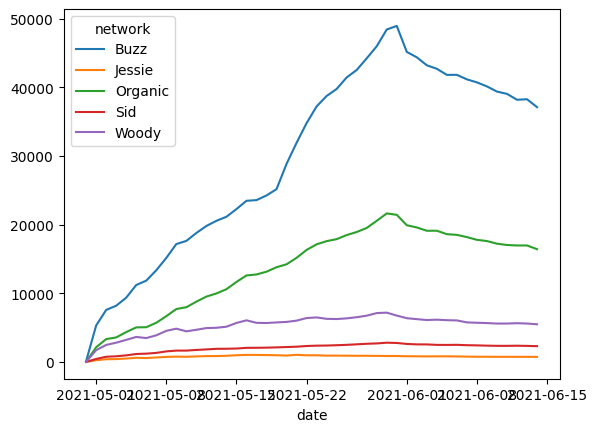

In [17]:
dau_by_network = analytics.dau_by_network()
dau_by_network.pivot(index='date', columns='network', values='dau').plot()

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


<Axes: xlabel='date'>

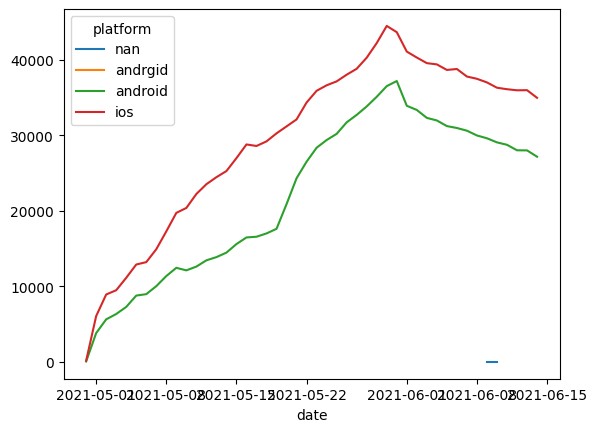

In [18]:
dau_by_platform = analytics.dau_by_platform()
dau_by_platform.pivot(index='date', columns='platform', values='dau').plot()

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


<Axes: title={'center': 'Installs'}, xlabel='install_date'>

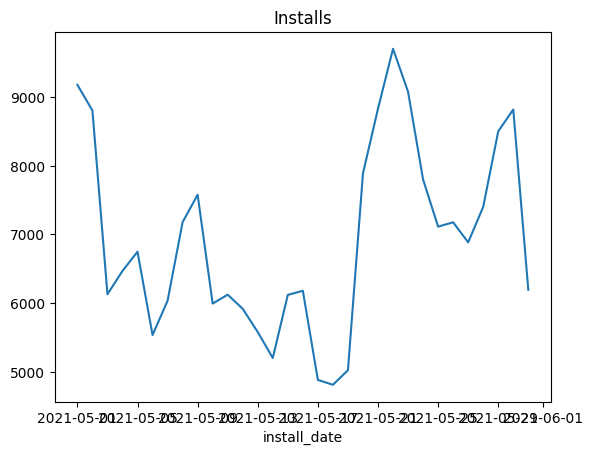

In [25]:
retention_trend = analytics.retention_trend().set_index('install_date')
retention_trend.installs.iloc[1:-1].plot(title='Installs')


<Axes: title={'center': 'Day 1 Retention'}, xlabel='install_date'>

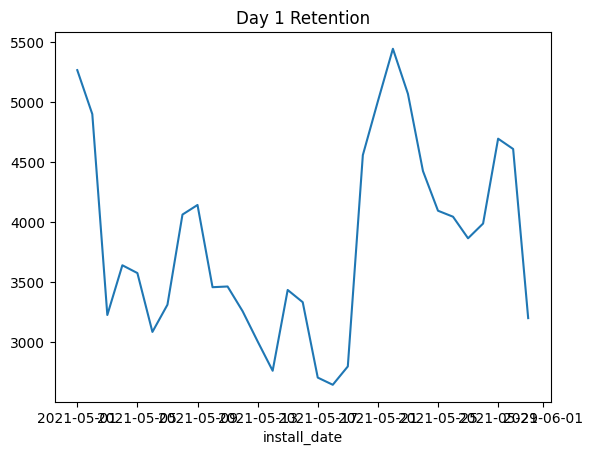

In [27]:
retention_trend.retained_day1.iloc[1:-1].plot(title='Day 1 Retention')

<Axes: title={'center': 'Day 1 Retention Rate'}, xlabel='install_date'>

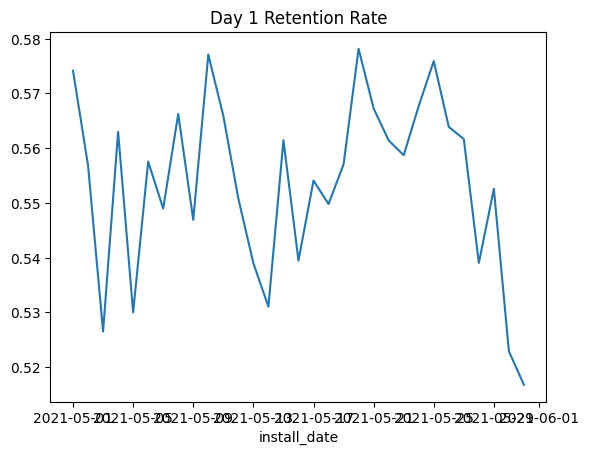

In [31]:
retention_trend.retention_day1.iloc[1:-1].plot(title='Day 1 Retention Rate')

### Cost Analysis

In [33]:
cost_query = """
        SELECT * FROM `casedreamgames.case_db.q1_table_cost`
        """
cost = analytics._run_query(cost_query)
cost

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,date,network,country,platform,cost
0,2021-05-04,Sid,Venus,android,0.0
1,2021-05-05,Sid,Venus,ios,1189.0
2,2021-05-13,Sid,Venus,android,0.0
3,2021-05-03,Sid,Venus,ios,1150.0
4,2021-05-24,Sid,Venus,ios,939.0
...,...,...,...,...,...
1352,2021-05-10,Organic,Mercury,ios,0.0
1353,2021-05-03,Organic,Mercury,android,0.0
1354,2021-05-28,Organic,Mercury,ios,0.0
1355,2021-05-31,Organic,Mercury,ios,0.0


In [34]:
cost.pivot(index='date', columns='network', values='cost').plot()

ValueError: Index contains duplicate entries, cannot reshape

In [2]:
seasonality_time_spent_query = """
SELECT
  EXTRACT(DAYOFWEEK FROM event_time) AS day_of_week, 
  EXTRACT(HOUR FROM event_time)     AS hour_of_day,
  AVG(time_spent)                   AS avg_time_spent
FROM `casedreamgames.case_db.q1_table_session`
GROUP BY
  day_of_week,
  hour_of_day
ORDER BY
  day_of_week,
  hour_of_day;

"""
seasonality_time_spent = dga._run_query(seasonality_time_spent_query)
seasonality_time_spent

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,day_of_week,hour_of_day,avg_time_spent
0,1,0,28.792727
1,1,1,28.785116
2,1,2,28.764168
3,1,3,28.743590
4,1,4,28.780398
...,...,...,...
163,7,19,28.801826
164,7,20,28.838274
165,7,21,28.848252
166,7,22,28.831900


/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


<Axes: >

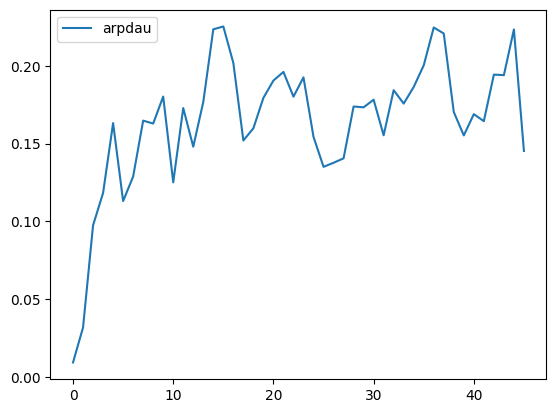

In [3]:
arpdau = dga.arpdau_trend()
arpdau.plot()

In [4]:
arpdau_by_network = dga.arpdau_by_network()
arpdau_by_network

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,network,date,total_revenue,dau,arpdau
0,Buzz,2021-04-30,NaN,132,NaN
1,Jessie,2021-04-30,NaN,6,NaN
2,Organic,2021-04-30,NaN,41,NaN
3,Sid,2021-04-30,NaN,10,NaN
4,Woody,2021-04-30,NaN,28,NaN
...,...,...,...,...,...
225,Buzz,2021-06-14,1438510.0,37115,38.758184
226,Jessie,2021-06-14,5502.0,740,7.435135
227,Organic,2021-06-14,675307.0,16428,41.107073
228,Sid,2021-06-14,442427.0,2302,192.192441


<Axes: xlabel='date'>

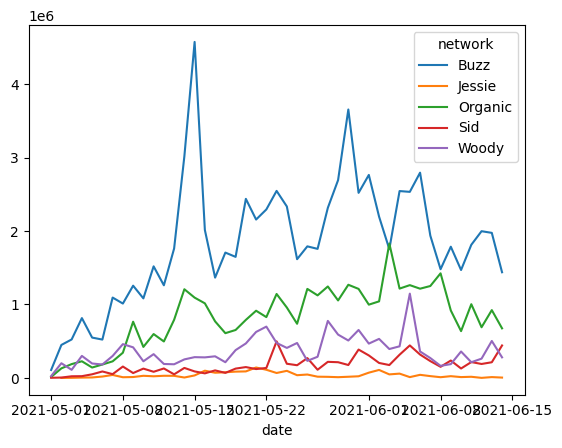

In [8]:
arpdau_by_network.groupby(['network', 'date']).total_revenue.mean().unstack(level=0).plot()

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


<Axes: xlabel='date'>

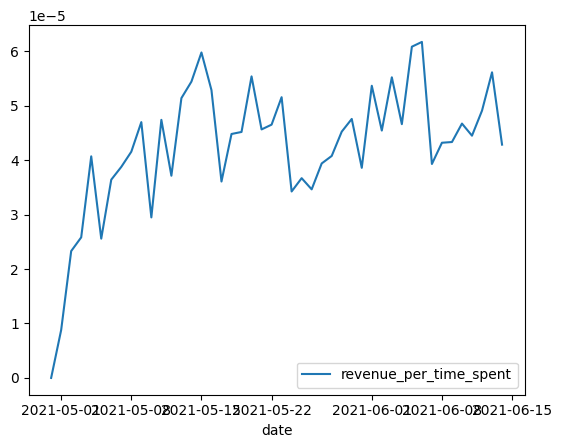

In [9]:
revenue_by_time_spent_query = """
WITH daily_sess AS (
  SELECT
    DATE(event_time) AS date,
    user_id,
    SUM(time_spent) AS daily_time_spent
  FROM `casedreamgames.case_db.q1_table_session`
  GROUP BY date, user_id
),
daily_rev AS (
  SELECT
    DATE(event_time) AS date,
    user_id,
    SUM(CAST(revenue AS FLOAT64)) AS daily_revenue
  FROM `casedreamgames.case_db.q1_table_revenue`
  GROUP BY date, user_id
)
SELECT
  ds.date,
  SAFE_DIVIDE(SUM(ds.daily_revenue), SUM(ds.daily_time_spent)) AS revenue_per_time_spent
FROM (
  SELECT
    s.date,
    s.user_id,
    COALESCE(r.daily_revenue, 0) AS daily_revenue,
    s.daily_time_spent
  FROM daily_sess AS s
  LEFT JOIN daily_rev AS r
    ON s.date = r.date
   AND s.user_id = r.user_id
) ds
GROUP BY
  ds.date
ORDER BY
  ds.date;
"""
revenue_by_time_spent = dga._run_query(revenue_by_time_spent_query)
revenue_by_time_spent = revenue_by_time_spent.set_index('date')
revenue_by_time_spent.plot()

<Axes: xlabel='day_of_week'>

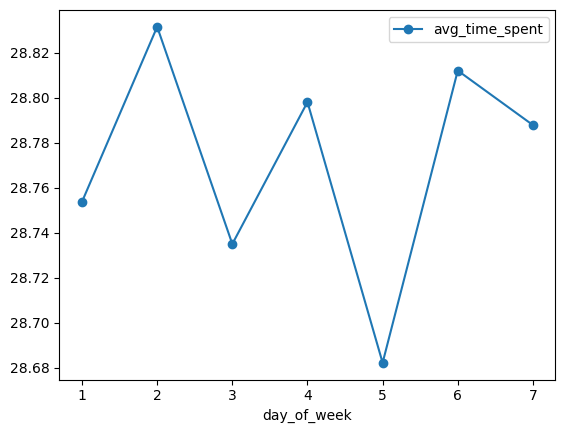

In [10]:
seasonality_time_spent.groupby('day_of_week')['avg_time_spent'].mean().plot(legend=True,style='o-')

<Axes: xlabel='hour_of_day'>

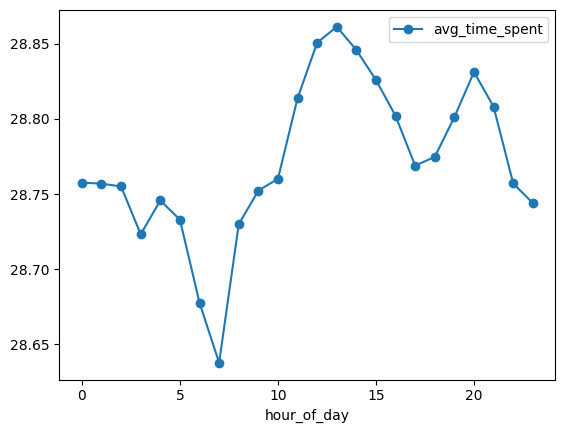

In [12]:
seasonality_time_spent.groupby('hour_of_day')['avg_time_spent'].mean().plot(legend=True,style='o-')

In [9]:
number_of_peoples_passing_level = """
SELECT level,
       COUNT(DISTINCT user_id) AS num_people_passed
FROM `casedreamgames.case_db.q1_table_level_end`
WHERE status = 'win'
GROUP BY level
ORDER BY level;
"""
number_of_peoples_passing_level = client.query(number_of_peoples_passing_level).result().to_dataframe()
number_of_peoples_passing_level = number_of_peoples_passing_level.set_index('level')
number_of_peoples_passing_level

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,num_people_passed
level,
1,201708
2,194977
3,189572
4,186212
5,182241
...,...
950,48
1007,1
1008,1


<Axes: xlabel='level'>

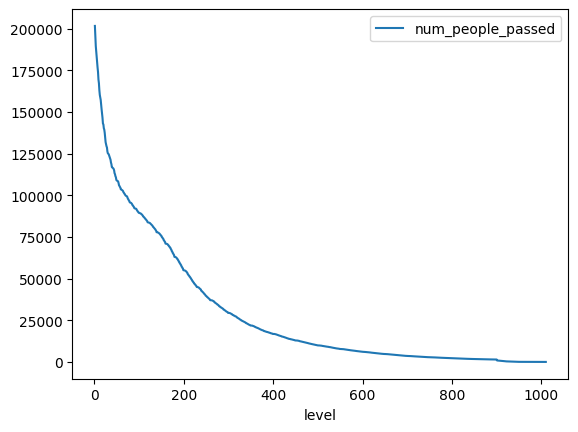

In [24]:
number_of_peoples_passing_level.plot()

In [16]:
avg_time_spent_per_level = """
WITH user_level_time AS (
  SELECT 
    user_id,
    level,
    SUM(time_spent) AS total_time_spent
  FROM `casedreamgames.case_db.q1_table_level_end`
  GROUP BY user_id, level
)
SELECT 
  level,
  AVG(total_time_spent) AS avg_time_spent_per_user
FROM user_level_time
GROUP BY level
ORDER BY level;

"""
avg_time_spent_per_level = client.query(avg_time_spent_per_level).result().to_dataframe()
avg_time_spent_per_level = avg_time_spent_per_level.set_index('level')
avg_time_spent_per_level

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,avg_time_spent_per_user
level,
1,28.144198
2,44.045061
3,37.834667
4,45.850616
5,54.180378
...,...
950,121.250000
1007,118.000000
1008,62.000000


<Axes: xlabel='level'>

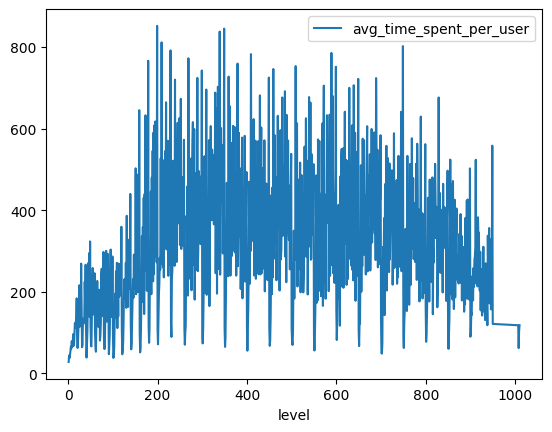

In [17]:
avg_time_spent_per_level.plot()

In [25]:
arpu_by_level_progress = """
WITH user_progress AS (
  -- Get the maximum level reached for each user
  SELECT
    user_id,
    MAX(level) AS max_level
  FROM `casedreamgames.case_db.q1_table_level_end`
  GROUP BY user_id
),
user_revenue AS (
  -- Sum the total revenue for each user
  SELECT
    user_id,
    SUM(CAST(revenue AS FLOAT64)) AS total_revenue
  FROM `casedreamgames.case_db.q1_table_revenue`
  GROUP BY user_id
),
user_data AS (
  -- Join the progress and revenue info for each user
  SELECT
    p.user_id,
    p.max_level,
    COALESCE(r.total_revenue, 0) AS total_revenue
  FROM user_progress p
  LEFT JOIN user_revenue r
    ON p.user_id = r.user_id
)
-- Group by the maximum level reached to compute ARPU
SELECT
  max_level,
  COUNT(user_id) AS num_users,
  SUM(total_revenue) AS total_revenue,
  ROUND(SUM(total_revenue) / COUNT(user_id), 2) AS arpu
FROM user_data
GROUP BY max_level
ORDER BY max_level;
"""
arpu_by_level_progress = client.query(arpu_by_level_progress).result().to_dataframe()
arpu_by_level_progress = arpu_by_level_progress.set_index('max_level')
arpu_by_level_progress

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,num_users,total_revenue,arpu
max_level,,,
1,8426,12.0,0.00
2,5542,30.0,0.01
3,3403,30.0,0.01
4,3960,30.0,0.01
5,2523,0.0,0.00
...,...,...,...
947,2,3045.0,1522.50
948,8,60.0,7.50
949,9,277.0,30.78


<Axes: xlabel='max_level'>

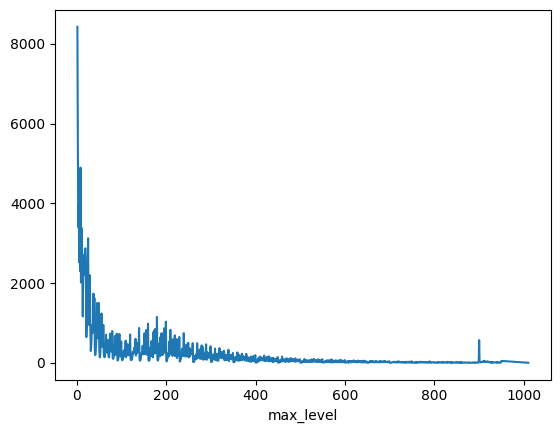

In [27]:
arpu_by_level_progress.num_users.plot()

<Axes: xlabel='max_level'>

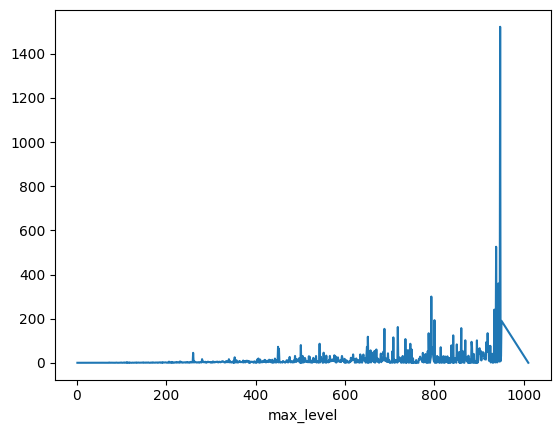

In [28]:
arpu_by_level_progress.arpu.plot()

In [7]:
avg_time_to_win_by_level = """
WITH user_level_attempts AS (
  SELECT 
    user_id,
    level,
    SUM(time_spent) AS total_active_time,
    MAX(CASE WHEN status = 'win' THEN 1 ELSE 0 END) AS passed
  FROM `casedreamgames.case_db.q1_table_level_end`
  GROUP BY user_id, level
)
SELECT 
  level,
  AVG(total_active_time) AS avg_time_to_pass
FROM user_level_attempts
WHERE passed = 1
GROUP BY level
ORDER BY level;

"""
avg_time_to_win_by_level = client.query(avg_time_to_win_by_level).result().to_dataframe()
avg_time_to_win_by_level = avg_time_to_win_by_level.set_index('level')

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [14]:
avg_time_to_win_by_level.iloc[100:150]

,avg_time_to_pass
level,
101,37.878785
102,40.759868
103,64.589559
104,133.006190
105,194.226238
106,135.473124
107,248.846341
108,180.307497
109,268.170028


<Axes: xlabel='level'>

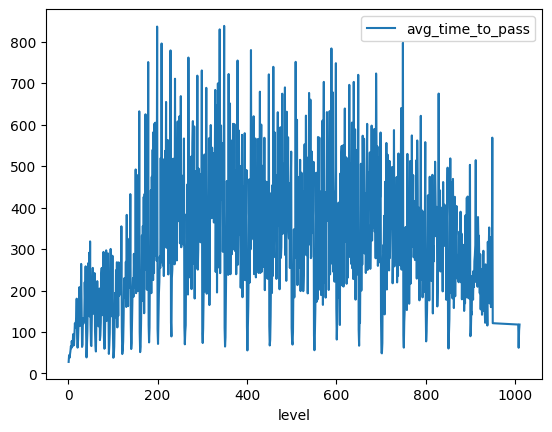

In [8]:
avg_time_to_win_by_level.plot()

In [23]:
ratio_of_last_failed_level_wrt_the_oone_before = """
WITH final_attempt AS (
  SELECT 
    user_id,
    status,
    event_time,
    ROW_NUMBER() OVER (PARTITION BY user_id ORDER BY event_time DESC) AS rn
  FROM `casedreamgames.case_db.q1_table_level_end`
),
-- Identify users whose last event is a failure (i.e. they quit)
users_quit AS (
  SELECT user_id
  FROM final_attempt
  WHERE rn = 1 AND status = 'fail'
),
-- For these users, get all failed attempts and rank them by event_time (latest first)
user_failed_attempts AS (
  SELECT 
    t.user_id,
    t.time_spent,
    t.event_time,
    ROW_NUMBER() OVER (PARTITION BY t.user_id ORDER BY t.event_time DESC) AS rn
  FROM `casedreamgames.case_db.q1_table_level_end` t
  INNER JOIN users_quit uq 
    ON t.user_id = uq.user_id
  WHERE t.status = 'fail'
),
-- For each user, get the last failed attempt and the one immediately before it
last_two_failed AS (
  SELECT 
    user_id,
    MAX(CASE WHEN rn = 1 THEN time_spent END) AS last_failed_time,
    MAX(CASE WHEN rn = 2 THEN time_spent END) AS previous_failed_time,
    COUNT(*) AS fail_count
  FROM user_failed_attempts
  GROUP BY user_id
  HAVING fail_count >= 2
),
-- Compute the ratio for each user
user_ratio AS (
  SELECT 
    user_id, 
    last_failed_time / previous_failed_time AS ratio
  FROM last_two_failed
)
-- Compute the median ratio using an approximate quantile function
SELECT 
  APPROX_QUANTILES(ratio, 100)[OFFSET(50)] AS median_ratio
FROM user_ratio;

"""

ratio_of_last_failed_level_wrt_the_oone_before = client.query(ratio_of_last_failed_level_wrt_the_oone_before).result().to_dataframe()
ratio_of_last_failed_level_wrt_the_oone_before

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,median_ratio
0,1.0


In [ ]:
avg_time_spent_on_last_level_by_level = """
WITH final_attempt AS (
  SELECT
    user_id,
    level,
    time_spent,
    status,
    event_time,
    ROW_NUMBER() OVER (PARTITION BY user_id ORDER BY event_time DESC) AS rn
  FROM `casedreamgames.case_db.q1_table_level_end`
),
last_failed AS (
  SELECT 
    user_id,
    level,
    time_spent
  FROM final_attempt
  WHERE rn = 1
    AND status = 'fail'
)
SELECT 
  level,
  COUNT(*) AS num_users,
  AVG(time_spent) AS avg_time_spent_on_last_failed_level
FROM last_failed
GROUP BY level
ORDER BY level;
"""
avg_time_spent_on_last_level_by_level = client.query(avg_time_spent_on_last_level_by_level).result().to_dataframe()
avg_time_spent_on_last_level_by_level = avg_time_spent_on_last_level_by_level.set_index('level')
avg_time_spent_on_last_level_by_level

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,num_users,avg_time_spent_on_last_failed_level
level,,
3,8,103.750000
4,10,130.300000
5,26,110.384615
6,161,153.422360
7,202,108.301980
...,...,...
945,7,112.285714
946,3,87.000000
947,2,128.000000


<Axes: xlabel='level'>

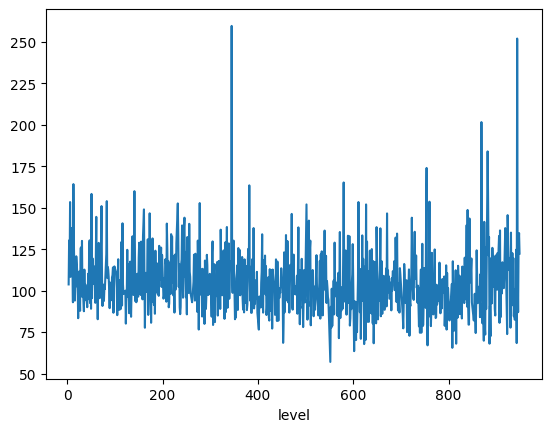

In [21]:
avg_time_spent_on_last_level_by_level.avg_time_spent_on_last_failed_level.plot()


In [ ]:
from DreamGamesAnalytics import BQManager
service_account_path = '/home/yusuf/DataScience/dream_games/ybektas20.json'

manager = BQManager(service_account_path)




arpdau_by_level = manager.get_arpdau(by='level')
arpdau_by_level 



/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,level,date,arpdau
0,1,2021-04-30,1.000000
1,1,2021-05-01,0.075222
2,1,2021-05-02,0.347124
3,1,2021-05-03,0.569906
4,1,2021-05-04,0.703608
...,...,...,...
36250,1008,2021-05-31,12549.000000
36251,1009,2021-05-31,12549.000000
36252,1010,2021-05-31,12549.000000
36253,1011,2021-05-31,12549.000000


In [2]:
arpdau_by_level.level.hist(bins=50)

NameError: name 'arpdau_by_level' is not defined

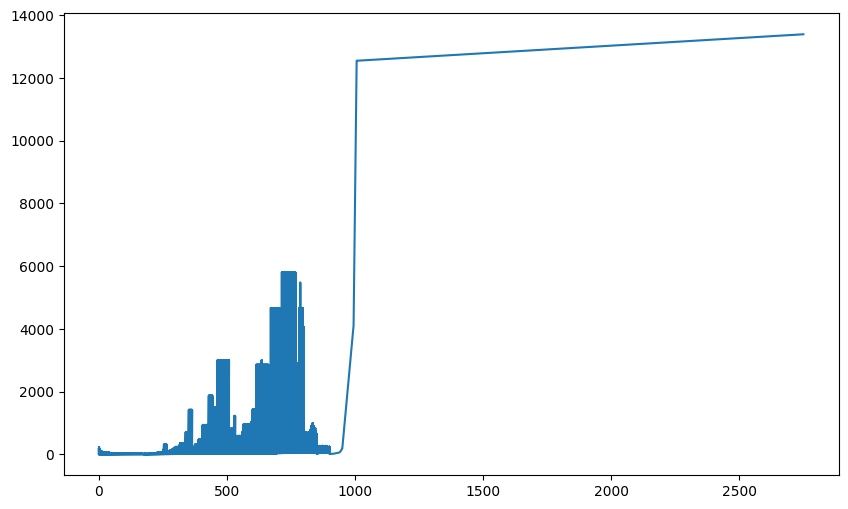

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(arpdau_by_level['level'], arpdau_by_level['arpdau'])


In [2]:
arpdau_by_level

,level,date,arpdau
0,1,2021-04-30,1.000000
1,1,2021-05-01,0.075222
2,1,2021-05-02,0.347124
3,1,2021-05-03,0.569906
4,1,2021-05-04,0.703608
...,...,...,...
36250,1008,2021-05-31,12549.000000
36251,1009,2021-05-31,12549.000000
36252,1010,2021-05-31,12549.000000
36253,1011,2021-05-31,12549.000000


In [ ]:
dau_by_platform = manager.get_dau(by='platform')
dau_by_platform


In [2]:
arpdau_by_platform = manager.get_arpdau(by='platform')
arpdau_by_platform

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,platform,date,arpdau
0,android,2021-04-30,0.033333
1,android,2021-05-01,0.022560
2,android,2021-05-02,0.031594
3,android,2021-05-03,0.054890
4,android,2021-05-04,0.069946
...,...,...,...
86,ios,2021-06-10,0.224819
87,ios,2021-06-11,0.271009
88,ios,2021-06-12,0.265965
89,ios,2021-06-13,0.305863


In [2]:
arpdau_by_level = manager.get_arpdau(by='level')
arpdau_by_level 

ValueError: Unsupported grouping for ARPDAU: level

In [5]:
import numpy as np
dau_by_platform.platform.replace({np.nan: 'unknown'}, inplace=True)
dau_by_platform.platform.unique()

array(['unknown', 'andrgid', 'android', 'ios'], dtype=object)

In [25]:
dau_by_platform.platform.value_counts()

platform
android    46
ios        46
andrgid     1
Name: count, dtype: int64

In [2]:
dau_query = """
-- Query 1: Daily Active Users (DAU)
SELECT
  DATE(event_time) AS date,
  COUNT(DISTINCT user_id) AS dau
FROM `casedreamgames.case_db.q1_table_session`
GROUP BY date
ORDER BY date;

"""

dau = client.query(dau_query).result().to_dataframe()
dau.set_index('date', inplace=True)
dau

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,dau
date,
2021-04-30,217
2021-05-01,9877
2021-05-02,14555
2021-05-03,15823
2021-05-04,18403
2021-05-05,21663
2021-05-06,22166
2021-05-07,24929
2021-05-08,28632


<Axes: title={'center': 'DAU'}, xlabel='date'>

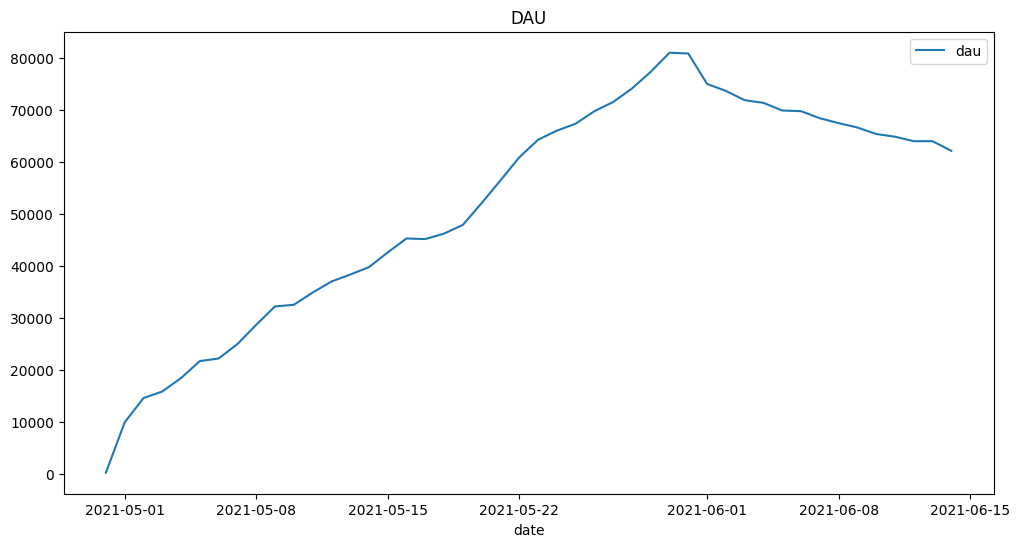

In [4]:
dau.plot(title='DAU', figsize=(12, 6))

In [5]:
arpu_query = """
SELECT
  DATE(i.event_time) AS date,
  SUM(CAST(r.revenue AS FLOAT64)) / COUNT(DISTINCT i.user_id) AS arpu
FROM `casedreamgames.case_db.q1_table_install` i
JOIN `casedreamgames.case_db.q1_table_revenue` r
  ON i.user_id = r.user_id
GROUP BY DATE(i.event_time)
ORDER BY date;

"""
arpu = client.query(arpu_query).result().to_dataframe()
#arpu.set_index('network', inplace=True)
#arpu.sort_values('arpu', ascending=False, inplace=True)
arpu.head()

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,date,arpu
0,2021-04-30,40.413793
1,2021-05-01,69.648936
2,2021-05-02,66.004831
3,2021-05-03,54.974074
4,2021-05-04,60.397810


In [7]:
arpu

,date,arpu
0,2021-04-30,40.413793
1,2021-05-01,69.648936
2,2021-05-02,66.004831
3,2021-05-03,54.974074
4,2021-05-04,60.397810
5,2021-05-05,46.202091
6,2021-05-06,73.138075
7,2021-05-07,53.048507
8,2021-05-08,62.968652
9,2021-05-09,50.280112


<Axes: >

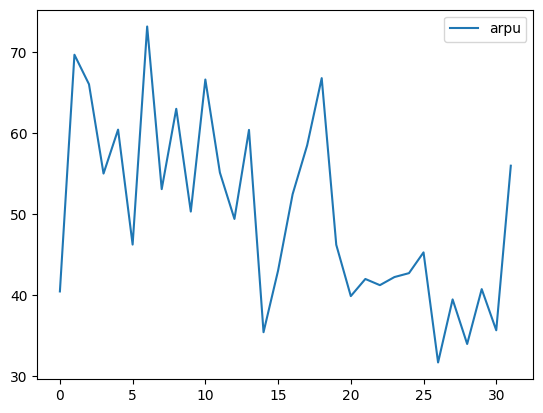

In [8]:
arpu.plot()

In [9]:
arpdau_query = """
-- Query 3: ARPDAU Trend
WITH daily_revenue AS (
  SELECT 
    DATE(event_time) AS date, 
    SUM(CAST(revenue AS FLOAT64)) AS total_revenue
  FROM `casedreamgames.case_db.q1_table_revenue`
  GROUP BY date
),
daily_active AS (
  SELECT 
    DATE(event_time) AS date, 
    COUNT(DISTINCT user_id) AS dau
  FROM `casedreamgames.case_db.q1_table_session`
  GROUP BY date
)
SELECT
  dr.date,
  dr.total_revenue / da.dau AS arpdau
FROM daily_revenue dr
JOIN daily_active da ON dr.date = da.date
ORDER BY dr.date;
"""
arpdau = client.query(arpdau_query).result().to_dataframe()
print("ARPDAU Trend:")
print(arpdau)


/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


ARPDAU Trend:
          date    arpdau
0   2021-04-30  0.009217
1   2021-05-01  0.031690
2   2021-05-02  0.097424
3   2021-05-03  0.118246
4   2021-05-04  0.163180
5   2021-05-05  0.113050
6   2021-05-06  0.128801
7   2021-05-07  0.164788
8   2021-05-08  0.162895
9   2021-05-09  0.180267
10  2021-05-10  0.125096
11  2021-05-11  0.172869
12  2021-05-12  0.148015
13  2021-05-13  0.176769
14  2021-05-14  0.223543
15  2021-05-15  0.225348
16  2021-05-16  0.201888
17  2021-05-17  0.152005
18  2021-05-18  0.159854
19  2021-05-19  0.179433
20  2021-05-20  0.190565
21  2021-05-21  0.196115
22  2021-05-22  0.180208
23  2021-05-23  0.192616
24  2021-05-24  0.154376
25  2021-05-25  0.135068
26  2021-05-26  0.137664
27  2021-05-27  0.140534
28  2021-05-28  0.173877
29  2021-05-29  0.173344
30  2021-05-30  0.178246
31  2021-05-31  0.155367
32  2021-06-01  0.184357
33  2021-06-02  0.175744
34  2021-06-03  0.186426
35  2021-06-04  0.200359
36  2021-06-05  0.224710
37  2021-06-06  0.220824
38  2021-06

In [11]:
arpdau.arpdau.describe()

count    46.000000
mean      0.164149
std       0.043165
min       0.009217
25%       0.149012
50%       0.171587
75%       0.189530
max       0.225348
Name: arpdau, dtype: float64

<Axes: title={'center': 'ARPDAU'}>

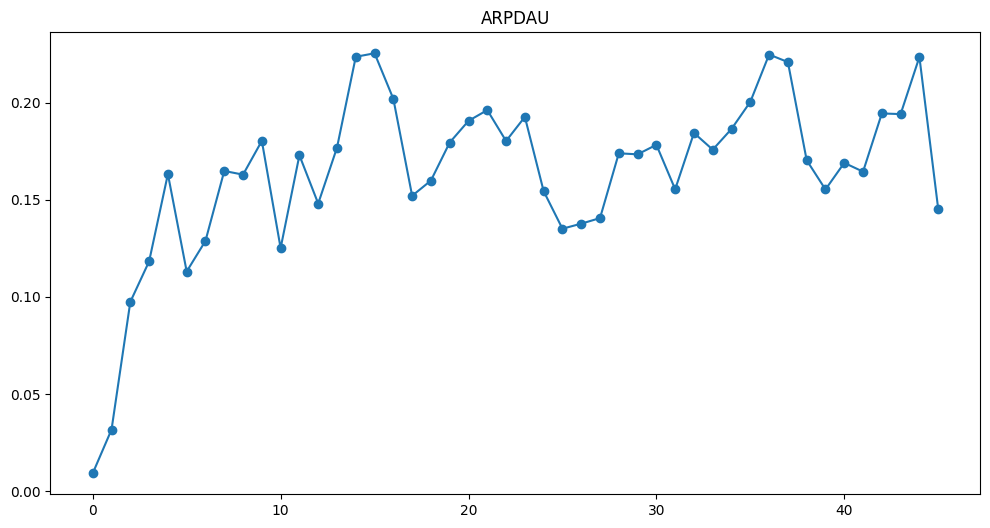

In [12]:
arpdau.arpdau.plot(title='ARPDAU', figsize=(12, 6),style='o-')

In [13]:
retention_query = """
-- Query 4: Next Day Retention Trend 
WITH installs AS (
  SELECT 
    user_id,
    DATE(event_time) AS install_date
  FROM `casedreamgames.case_db.q1_table_install`
),
next_day_sessions AS (
  SELECT 
    user_id,
    DATE(event_time) AS session_date
  FROM `casedreamgames.case_db.q1_table_session`
)
SELECT
  i.install_date,
  COUNT(DISTINCT i.user_id) AS installs,
  COUNT(DISTINCT n.user_id) AS retained_users,
  COUNT(DISTINCT n.user_id) / COUNT(DISTINCT i.user_id) AS retention_rate
FROM installs i
LEFT JOIN next_day_sessions n
  ON i.user_id = n.user_id 
  AND n.session_date = DATE_ADD(i.install_date, INTERVAL 1 DAY)
GROUP BY i.install_date
ORDER BY i.install_date;
"""
retention = client.query(retention_query).result().to_dataframe()
print(retention)


/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


   install_date  installs  retained_users  retention_rate
0    2021-04-30      1064             716        0.672932
1    2021-05-01      9177            5269        0.574153
2    2021-05-02      8803            4902        0.556856
3    2021-05-03      6127            3226        0.526522
4    2021-05-04      6467            3641        0.563012
5    2021-05-05      6747            3576        0.530013
6    2021-05-06      5533            3085        0.557564
7    2021-05-07      6033            3312        0.548981
8    2021-05-08      7177            4064        0.566253
9    2021-05-09      7577            4144        0.546918
10   2021-05-10      5992            3458        0.577103
11   2021-05-11      6121            3464        0.565921
12   2021-05-12      5915            3258        0.550803
13   2021-05-13      5577            3006        0.538999
14   2021-05-14      5199            2761        0.531064
15   2021-05-15      6118            3435        0.561458
16   2021-05-1

<Axes: title={'center': 'Next Day Retention Rate'}>

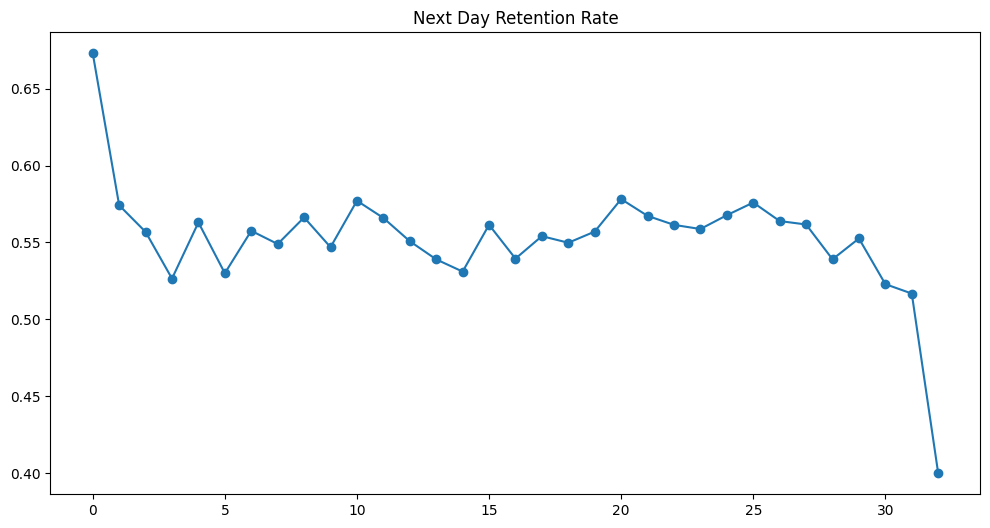

In [15]:
retention.retention_rate.plot(title='Next Day Retention Rate', figsize=(12, 6),style='o-')

In [17]:
roas_query = """
-- Query 5: Daily ROAS Trend
WITH daily_revenue AS (
  SELECT 
    DATE(event_time) AS date, 
    SUM(CAST(revenue AS FLOAT64)) AS total_revenue
  FROM `casedreamgames.case_db.q1_table_revenue`
  GROUP BY date
),
daily_cost AS (
  SELECT 
    date, 
    SUM(cost) AS total_cost
  FROM `casedreamgames.case_db.q1_table_cost`
  GROUP BY date
)
SELECT
  r.date,
  r.total_revenue,
  c.total_cost,
  r.total_revenue / c.total_cost AS roas
FROM daily_revenue r
JOIN daily_cost c ON r.date = c.date
ORDER BY r.date;
"""
roas = client.query(roas_query).result().to_dataframe()
print("Daily ROAS Trend:")
print(roas)


/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Daily ROAS Trend:
          date  total_revenue  total_cost      roas
0   2021-05-01          313.0     43909.0  0.007128
1   2021-05-02         1418.0     42177.0  0.033620
2   2021-05-03         1871.0     34666.0  0.053972
3   2021-05-04         3003.0     33170.0  0.090534
4   2021-05-05         2449.0     37068.0  0.066068
5   2021-05-06         2855.0     28627.0  0.099731
6   2021-05-07         4108.0     30395.0  0.135154
7   2021-05-08         4664.0     35593.0  0.131037
8   2021-05-09         5799.0     35922.0  0.161433
9   2021-05-10         4063.0     30915.0  0.131425
10  2021-05-11         6020.0     30423.0  0.197877
11  2021-05-12         5469.0     30067.0  0.181894
12  2021-05-13         6769.0     27488.0  0.246253
13  2021-05-14         8876.0     25610.0  0.346583
14  2021-05-15         9587.0     28724.0  0.333763
15  2021-05-16         9131.0     30669.0  0.297727
16  2021-05-17         6858.0     24137.0  0.284128
17  2021-05-18         7380.0     24581.0  0.3

<Axes: title={'center': 'Daily ROAS Trend'}>

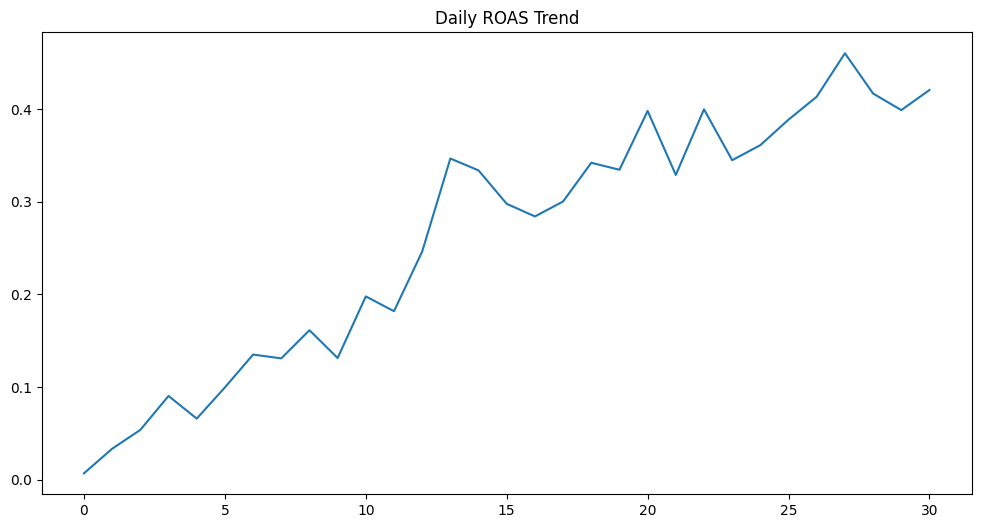

In [18]:
roas.roas.plot(title='Daily ROAS Trend', figsize=(12, 6))

In [19]:
arpdau_by_package_type_query = """
-- Query: ARPDAU by Package Type
WITH daily_package_revenue AS (
  SELECT
    package_type,
    DATE(event_time) AS date,
    SUM(CAST(revenue AS FLOAT64)) AS total_revenue,
    COUNT(DISTINCT user_id) AS purchasing_users
  FROM `casedreamgames.case_db.q1_table_revenue`
  GROUP BY package_type, date
)
SELECT
  package_type,
  date,
  total_revenue / purchasing_users AS arpdau
FROM daily_package_revenue
ORDER BY package_type, date;
"""
arpdau_by_package_type = client.query(arpdau_by_package_type_query).result().to_dataframe()
print("ARPDAU by Package Type:")
print(arpdau_by_package_type)


/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


ARPDAU by Package Type:
      package_type        date     arpdau
0    awesome_packs  2021-05-01   4.529412
1    awesome_packs  2021-05-02  10.117647
2    awesome_packs  2021-05-03   8.934426
3    awesome_packs  2021-05-04   9.860215
4    awesome_packs  2021-05-05   6.066667
..             ...         ...        ...
111   pretty_packs  2021-06-07   8.982143
112   pretty_packs  2021-06-11   5.574230
113   pretty_packs  2021-06-12   8.087302
114   pretty_packs  2021-06-13   9.344660
115   pretty_packs  2021-06-14  13.763636

[116 rows x 3 columns]


In [22]:
arpdau_by_package_type.groupby('package_type').arpdau.count()

package_type
awesome_packs    45
cool_packs        1
lovely_packs     46
pretty_packs     24
Name: arpdau, dtype: int64

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


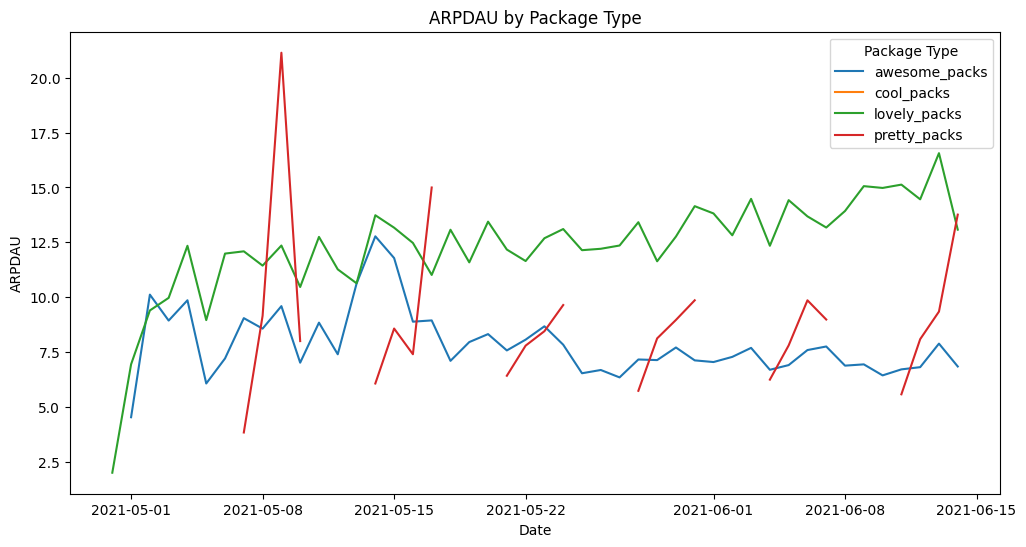

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


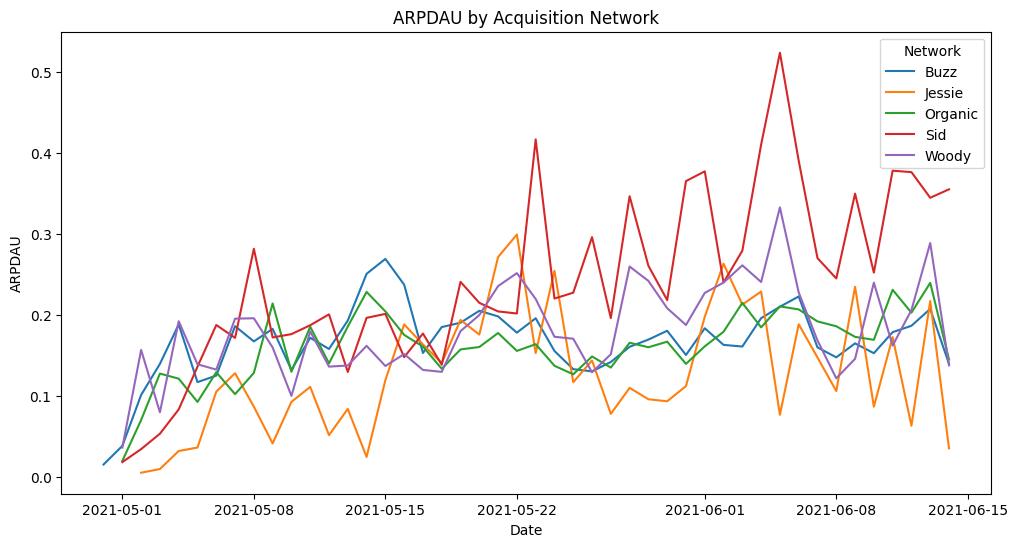

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


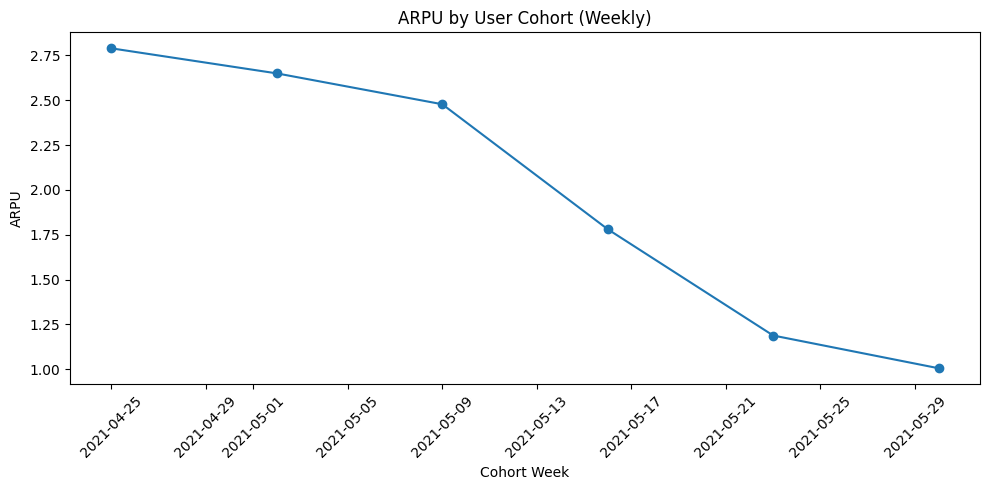

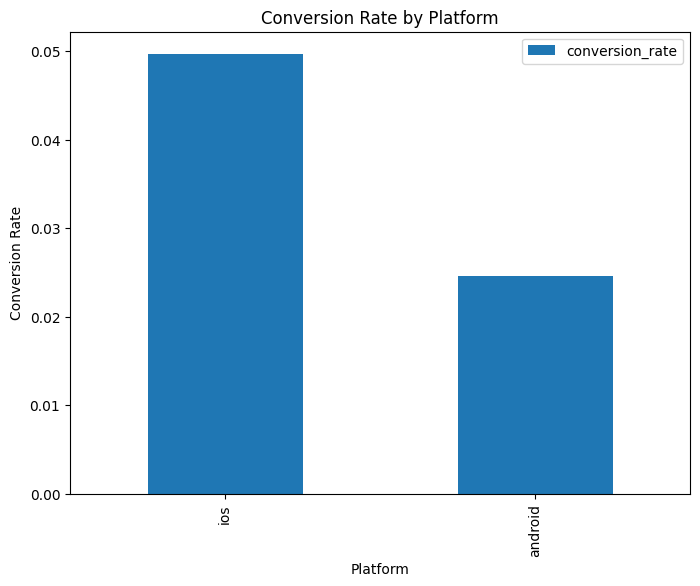

/home/yusuf/myenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


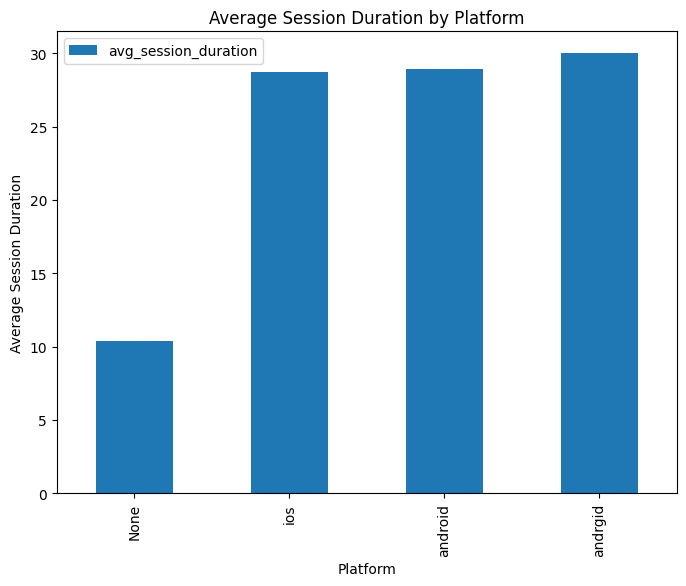

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. ARPDAU by Package Type
arpdau_by_package_type_query = """
-- Query: ARPDAU by Package Type
WITH daily_package_revenue AS (
  SELECT
    package_type,
    DATE(event_time) AS date,
    SUM(CAST(revenue AS FLOAT64)) AS total_revenue,
    COUNT(DISTINCT user_id) AS purchasing_users
  FROM `casedreamgames.case_db.q1_table_revenue`
  GROUP BY package_type, date
)
SELECT
  package_type,
  date,
  total_revenue / purchasing_users AS arpdau
FROM daily_package_revenue
ORDER BY package_type, date;
"""
arpdau_by_package_type = client.query(arpdau_by_package_type_query).result().to_dataframe()
# Pivot for line plot: rows = date, columns = package_type, values = arpdau
df_arpdau_pkg = arpdau_by_package_type.pivot(index='date', columns='package_type', values='arpdau')
df_arpdau_pkg.plot(figsize=(12,6))
plt.title("ARPDAU by Package Type")
plt.xlabel("Date")
plt.ylabel("ARPDAU")
plt.legend(title="Package Type")
plt.show()

# 2. ARPDAU Network Based
arpdau_network_query = """
-- Query: ARPDAU Network Based
WITH revenue_network AS (
  SELECT
    i.network,
    DATE(r.event_time) AS date,
    SUM(CAST(r.revenue AS FLOAT64)) AS total_revenue
  FROM `casedreamgames.case_db.q1_table_revenue` r
  JOIN `casedreamgames.case_db.q1_table_install` i ON r.user_id = i.user_id
  GROUP BY i.network, date
),
dau_network AS (
  SELECT
    i.network,
    DATE(s.event_time) AS date,
    COUNT(DISTINCT s.user_id) AS dau
  FROM `casedreamgames.case_db.q1_table_session` s
  JOIN `casedreamgames.case_db.q1_table_install` i ON s.user_id = i.user_id
  GROUP BY i.network, date
)
SELECT
  r.network,
  r.date,
  r.total_revenue / d.dau AS arpdau
FROM revenue_network r
JOIN dau_network d ON r.network = d.network AND r.date = d.date
ORDER BY r.network, r.date;
"""
arpdau_network = client.query(arpdau_network_query).result().to_dataframe()
# Pivot for line plot: rows = date, columns = network, values = arpdau
df_arpdau_net = arpdau_network.pivot(index='date', columns='network', values='arpdau')
df_arpdau_net.plot(figsize=(12,6))
plt.title("ARPDAU by Acquisition Network")
plt.xlabel("Date")
plt.ylabel("ARPDAU")
plt.legend(title="Network")
plt.show()

# 3. ARPU by User Cohort
arpu_by_user_cohort_query = """
-- Query: ARPU by User Cohort
WITH cohort AS (
  SELECT
    user_id,
    DATE_TRUNC(DATE(event_time), WEEK) AS cohort_week
  FROM `casedreamgames.case_db.q1_table_install`
),
cohort_revenue AS (
  SELECT
    c.cohort_week,
    SUM(CAST(r.revenue AS FLOAT64)) AS total_revenue,
    COUNT(DISTINCT c.user_id) AS users
  FROM cohort c
  LEFT JOIN `casedreamgames.case_db.q1_table_revenue` r ON c.user_id = r.user_id
  GROUP BY c.cohort_week
)
SELECT
  cohort_week,
  total_revenue / users AS arpu
FROM cohort_revenue
ORDER BY cohort_week;
"""
arpu_by_user_cohort = client.query(arpu_by_user_cohort_query).result().to_dataframe()
plt.figure(figsize=(10,5))
plt.plot(arpu_by_user_cohort['cohort_week'], arpu_by_user_cohort['arpu'], marker='o')
plt.title("ARPU by User Cohort (Weekly)")
plt.xlabel("Cohort Week")
plt.ylabel("ARPU")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Conversion Rate by Groups (Platform)
conversion_rate_query = """
-- Query: Conversion Rate by Groups (Platform)
WITH installs AS (
  SELECT
    user_id,
    platform
  FROM `casedreamgames.case_db.q1_table_install`
),
conversions AS (
  SELECT DISTINCT user_id
  FROM `casedreamgames.case_db.q1_table_revenue`
)
SELECT
  i.platform,
  COUNT(DISTINCT i.user_id) AS installs,
  COUNT(DISTINCT c.user_id) AS converters,
  COUNT(DISTINCT c.user_id) / COUNT(DISTINCT i.user_id) AS conversion_rate
FROM installs i
LEFT JOIN conversions c ON i.user_id = c.user_id
GROUP BY i.platform;
"""
conversion_rate_by_groups = client.query(conversion_rate_query).result().to_dataframe()
conversion_rate_by_groups.set_index('platform', inplace=True)
conversion_rate_by_groups[['conversion_rate']].plot(kind='bar', figsize=(8,6))
plt.title("Conversion Rate by Platform")
plt.xlabel("Platform")
plt.ylabel("Conversion Rate")
plt.show()

# 5. Average Session Duration by Groups (Platform)
avg_session_duration_query = """
-- Query: Average Session Duration by Groups (Platform)
SELECT
  platform,
  AVG(time_spent) AS avg_session_duration
FROM `casedreamgames.case_db.q1_table_session`
GROUP BY platform;
"""
avg_session_duration = client.query(avg_session_duration_query).result().to_dataframe()
avg_session_duration.set_index('platform', inplace=True)
avg_session_duration.plot(kind='bar', y='avg_session_duration', figsize=(8,6))
plt.title("Average Session Duration by Platform")
plt.xlabel("Platform")
plt.ylabel("Average Session Duration")
plt.show()
